### Table of Contents

# 1. Import Data

## 1.1 Import the needed libraries

In [1]:
from datetime import date
from datetime import datetime
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import parallel_coordinates
import seaborn as sns
from scipy.spatial.distance import cdist
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import KNNImputer
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

% matplotlib inline
pd.set_option('display.max_columns', None)

UsageError: Line magic function `%` not found.


## 1.2 Import a integrate data

In [2]:
df_crm = pd.read_csv('crm.csv')
df_mkt = pd.read_csv('mkt.csv')
df_sales = pd.read_excel('sales.xlsx')

In [3]:
df = pd.merge(pd.merge(df_crm, df_sales, on='CustomerID', how="inner"), df_mkt, on="CustomerID", how="inner")

## 1.3 Set Index


In [4]:
df.set_index('CustomerID', inplace=True)

## 1.4 Check and removing duplicates

In [5]:
df[df.duplicated()]  # checking duplicates

Name  Birthyear   Education Marital_Status  \
CustomerID                                                                   
32924               Mrs. Wanda Terry       1986  Graduation       Divorced   
8276               Mrs. Mary Jackson       1968  HighSchool        Married   
32966               Mr. Steven Baker       1961  HighSchool        Married   
5627              Mr. Jonathan Clark       1988  Graduation        Married   
29357              Mr. Eric Springer       1972         PhD        Married   
26891                  Mr. Sam Peake       1992  Graduation        Married   
21269              Mr. Nathan Glover       1971  Graduation        Married   
32777                  Mr. Joe James       1967      Master        Married   
26285           Mr. Oliver Sanderson       1986       Basic       Together   
5540              Mr. Justin MacLeod       1995  Graduation       Together   
17069             Miss Zoe Underwood       1977  Graduation       Together   
12320         Mr. Christian Morrison       1985      Master        Married   
24260                Mr. Dan Langdon       1993  Graduation         Single   
6470                Miss Diane White       1980  Graduation         Single   
10265                 Mr. Max Martin       1988  HighSchool       Together   
21767                 Mrs. Jan Sharp       1977      Master        Married   
15905              Mr. Charles James       1957         PhD       Together   
28688             Mr. Anthony Gibson       1976  Graduation       Together   
28739          Mr. Stephen Henderson       1970  Graduation        Married   
25052                Mr. Piers Nolan       1977      Master       Divorced   
7586                Mr. Jason Powell       1985      Master        Married   
32495             Miss Wanda Wallace       1962  Graduation       Together   
19295              Mr. Justin Martin       1998  Graduation       Together   
14942              Mr. Stewart North       1978         PhD       Together   
20747               Mr. Luke Lambert       1988         PhD        Married   
12035              Mrs. Heather Hart       1985  Graduation        Married   
8447               Mrs. Grace Davies       1967  Graduation        Married   
25685                Mr. Austin Knox       1955         PhD          Widow   
28625                Mr. Frank Piper       1969       Basic        Married   
28844                  Mr. Neil Dowd       1981  Graduation        Married   
30464       Miss Gabrielle Churchill       1960  Graduation       Together   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
32924        41264.0             1               1  2020-10-03 00:00:00   
8276        118238.0             0               0  2020-10-13 00:00:00   
32966        84974.0             0               1  2022-02-17 00:00:00   
5627         40975.0             1               0  2022-04-28 00:00:00   
29357        77778.0             0               1  2022-04-19 00:00:00   
26891        74147.0             1               0  2022-03-21 00:00:00   
21269        91241.0             0               1  2022-03-28 00:00:00   
32777       101251.0             0               1  2021-12-30 00:00:00   
26285        22345.0             1               0  2021-03-21 00:00:00   
5540         44247.0             1               0  2021-03-08 00:00:00   
17069        75226.0             1               1  2020-11-24 00:00:00   
12320        39747.0             1               0  2021-04-06 00:00:00   
24260       116645.0             0               0  2021-05-18 00:00:00   
6470        127255.0             0               0  2021-06-17 00:00:00   
10265        27838.0             1               0  2021-10-08 00:00:00   
21767        54507.0             1               1  2020-10-27 00:00:00   
15905        95655.0             0               0  2020-09-04 00:00:00   
28688        77992.0            

31 duplicated rows, with the entire same value

In [6]:
df = df[~df.duplicated()]  # drop duplicates rows

# 2. Explore Data

## 2.1 Basic Exploration

Q: _To check the number of columns and rows_ we used `shape` _attribute_

In [7]:
df.shape

(7000, 26)

A: _The dataset has **7000 rows** and **26 columns**_

__*Q*__: Check the name of the features of the dataset we used `columns` _attribute_

In [8]:
df.columns

Index(['Name', 'Birthyear', 'Education', 'Marital_Status', 'Income',
       'Kid_Younger6', 'Children_6to18', 'Date_Adherence', 'Recency',
       'MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
       'MntDesserts', 'MntAdditionalRequests', 'NumOfferPurchases',
       'NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases',
       'NumAppVisitsMonth', 'Complain', 'Response_Cmp1', 'Response_Cmp2',
       'Response_Cmp3', 'Response_Cmp4', 'Response_Cmp5'],
      dtype='object')

Q: First glance of the dataset using `head` to show 5 rows.

In [9]:
df.head(5)

Name  Birthyear   Education Marital_Status  \
CustomerID                                                             
14594          Miss Leah Lewis       1981  Graduation         Single   
19070         Miss Grace Black       1974  Graduation       Together   
29888       Mr. Gavin Morrison       1960         PhD       Together   
12221          Mr. Ryan Glover       1980  Graduation        Married   
21107        Mr. Paul Anderson       1971  HighSchool         Single   

              Income  Kid_Younger6  Children_6to18       Date_Adherence  \
CustomerID                                                                
14594       113947.0             0               0  2021-01-09 00:00:00   
19070       114297.0             0               0  2021-04-10 00:00:00   
29888       115476.0             0               0  2022-01-12 00:00:00   
12221       101172.0             1               1  2021-10-12 00:00:00   
21107       123128.0             0               0  2020-12-11 00:00:00   

            Recency  MntMeat&Fish  ...  NumAppPurchases  NumTakeAwayPurchases  \
CustomerID                         ...                                          
14594          43.0        4640.0  ...               10                     7   
19070          74.0        7080.0  ...                5                     9   
29888          85.0        4130.0  ...                5                     5   
12221          25.0        3590.0  ...                8                     3   
21107          64.0        5390.0  ...                4                     7   

            NumStorePurchases  NumAppVisitsMonth  Complain  Response_Cmp1  \
CustomerID                                                                  
14594                       7                  4         0              0   
19070                      12                  2         0              0   
29888                       7                  1         0              0   
12221                       8                  5         0              0   
21107                       8                  5         0              1   

            Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  
CustomerID                                                              
14594                   1              0              0              0  
19070                   0              0              0              0  
29888                   0              0              0              0  
12221                   0              0              0              0  
21107                   0              1              0              0  

[5 rows x 26 columns]

Q: To check the basic information of the dataset we've used the `info` method

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7000 entries, 14594 to 15581
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Name                   7000 non-null   object 
 1   Birthyear              7000 non-null   int64  
 2   Education              6986 non-null   object 
 3   Marital_Status         7000 non-null   object 
 4   Income                 7000 non-null   float64
 5   Kid_Younger6           7000 non-null   int64  
 6   Children_6to18         7000 non-null   int64  
 7   Date_Adherence         7000 non-null   object 
 8   Recency                6977 non-null   float64
 9   MntMeat&Fish           7000 non-null   float64
 10  MntEntries             7000 non-null   int64  
 11  MntVegan&Vegetarian    7000 non-null   float64
 12  MntDrinks              6972 non-null   float64
 13  MntDesserts            7000 non-null   float64
 14  MntAdditionalRequests  7000 non-null   float64
 15 

>A: We can observe the data type of the dataset and the how many of features per data type  `dtypes: float64 - (7), int64 - (15), object - (4)`, the memory usage of `1.4+MB`, and the non-null values present per columns. <br>
> Using only `info` method we understand that `'Education', 'Recency', 'MntDrinks'` have __14, 23, 28 null values__ that require some action.

# 2.2 Statistical Exploration

## 2.2.1 Numerical Variables

In [11]:
df.describe()

Birthyear         Income  Kid_Younger6  Children_6to18      Recency  \
count  7000.000000    7000.000000   7000.000000     7000.000000  6977.000000   
mean   1976.451429   77988.962407      0.440571        0.490571    49.235058   
std      11.996270   35409.810253      0.543477        0.542174    28.922688   
min    1948.000000    2493.800000      0.000000        0.000000     0.000000   
25%    1967.000000   51586.250000      0.000000        0.000000    24.000000   
50%    1977.000000   77190.000000      0.000000        0.000000    49.000000   
75%    1985.000000  102016.250000      1.000000        1.000000    74.000000   
max    2005.000000  237639.725000      2.000000        2.000000    99.000000   

       MntMeat&Fish   MntEntries  MntVegan&Vegetarian    MntDrinks  \
count   7000.000000  7000.000000          7000.000000  6972.000000   
mean    3079.523800   534.749429          2785.050786   545.657544   
std     3370.377166   787.846684          3908.718244   805.149088   
min        0.000000     0.000000             0.000000     0.000000   
25%      250.000000    40.000000           240.000000    40.000000   
50%     1820.000000   180.000000          1110.000000   180.000000   
75%     5070.000000   680.000000          3795.000000   700.000000   
max    14980.000000  3980.000000         25974.000000  3980.000000   

       MntDesserts  ...  NumAppPurchases  NumTakeAwayPurchases  \
count  7000.000000  ...      7000.000000           7000.000000   
mean    540.656029  ...         6.015714              3.834571   
std     802.221866  ...         2.745537              3.331142   
min       0.000000  ...         0.000000              0.000000   
25%      40.000000  ...         4.000000              1.000000   
50%     180.000000  ...         6.000000              3.000000   
75%     680.000000  ...         8.000000              5.000000   
max    3980.000000  ...        13.000000             24.000000   

       NumStorePurchases  NumAppVisitsMonth     Complain  Response_Cmp1  \
count        7000.000000        7000.000000  7000.000000    7000.000000   
mean            5.790571           5.278286     0.010286       0.079143   
std             3.295708           2.748596     0.100903       0.269981   
min             0.000000           0.000000     0.000000       0.000000   
25%             3.000000           3.000000     0.000000       0.000000   
50%             5.000000           5.000000     0.000000       0.000000   
75%             8.000000           7.000000     0.000000       0.000000   
max            13.000000          20.000000     1.000000       1.000000   

       Response_Cmp2  Response_Cmp3  Response_Cmp4  Response_Cmp5  
count    7000.000000    7000.000000    7000.000000    7000.000000  
mean        0.073286       0.083000       0.065857       0.014286  
std         0.260624       0.275902       0.248050       0.118675  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 22 columns]

> _The describe return we can get a first glance and make some conclusion:_

>__Birthyear__ - could originate an Age column for readability purposes<br>
__Income__ - Min and Max are very far from each other and far from the mean value which could indicate outliers<br>
__Recency__ - 6977 valid values, hence we should look in deep and decide on how to minimize that effect of missing values<br>
__MntMeat&Fish__ - Min and Max are distant from each other and have high standard deviation which could effect some future conclusion<br>
__MntEntries__ - Again has high standard deviation that we should analyze, Min and Max far apart, similar to MntMeat&Fish<br>
__MntVegan&Vegetarian__ - Similar to the previous two Mnt columns<br>
__MntDrinks, MntDesserts__ - Seems to be very similar between them<br>
__MntAdditionalRequests__ - The max value standard deviation seems high and also the max value very far apart from the mean<br>
__NumOfferPurchases, NumTakeAwayPurchases, NumAppVisitsMonth__  - Have a max value to distante from the mean that could be true but we need to take into account<br>
__NumAppPurchases, SumStorePurchases__ - Seems does not have strange summary statistcs<br>
__Kid_Younger6, Children_6to18__ - 75% of clients have at least one child

**Q**: Skewness of each variable 

In [12]:
df.skew()

/var/folders/zb/r83qxb_974vbg2bs9xjz4yvh0000gp/T/ipykernel_41511/547062910.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


Birthyear               -0.092478
Income                   0.844721
Kid_Younger6             0.693587
Children_6to18           0.451693
Recency                  0.017676
MntMeat&Fish             1.148862
MntEntries               2.087220
MntVegan&Vegetarian      2.486897
MntDrinks                2.046308
MntDesserts              2.057811
MntAdditionalRequests    1.826522
NumOfferPurchases        2.860514
NumAppPurchases          0.525873
NumTakeAwayPurchases     2.254158
NumStorePurchases        0.623254
NumAppVisitsMonth        1.005192
Complain                 9.709429
Response_Cmp1            3.118572
Response_Cmp2            3.275500
Response_Cmp3            3.023677
Response_Cmp4            3.501448
Response_Cmp5            8.187993
dtype: float64

Concerning the variables' skewness, we can conclude the following:
- `Moderate skewness (between |0.5| and |1.0|)`: Birthyear, Income, Kid_Younger6, Children_6to18, Recency, NumAppPurchases, NumStorePurchases, NumAppVisitsMonth
- `High skewness (higher than |1.0|)`: MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumTakeAwayPurchases, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5

In [13]:
df.kurt()

/var/folders/zb/r83qxb_974vbg2bs9xjz4yvh0000gp/T/ipykernel_41511/3952544226.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


Birthyear                -0.857341
Income                    2.649035
Kid_Younger6             -0.651127
Children_6to18           -0.973333
Recency                  -1.197978
MntMeat&Fish              0.532098
MntEntries                4.096167
MntVegan&Vegetarian       8.431538
MntDrinks                 3.839256
MntDesserts               3.813464
MntAdditionalRequests     3.084190
NumOfferPurchases        10.997946
NumAppPurchases          -0.222899
NumTakeAwayPurchases      8.582138
NumStorePurchases        -0.694327
NumAppVisitsMonth         4.992870
Complain                 92.299387
Response_Cmp1             7.727700
Response_Cmp2             8.731398
Response_Cmp3             7.144665
Response_Cmp4            10.263068
Response_Cmp5            65.061813
dtype: float64

Features with kurtosis higher than 3 could indicate presence of outliers, hence we should have special consideration with the following features:
>MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, NumOfferPurchases, NumAppVisitsMonth

Note: Binomial Variables Complain, and Response_Cmp1 the kurtosis we will not consider as outliers

## 2.2.2 Categorical Values

In [14]:
df.describe(include=object)

Name   Education Marital_Status       Date_Adherence
count                7000        6986           7000                 7000
unique               6241           9             10                  701
top     Mr. Stewart Grant  Graduation        Married  2020-09-19 00:00:00
freq                    3        3497           2830                   23

We can conclude that the education as **14 missing** values

#### Level/Possible values of Categorical Features

### `Name` prefix unique values and count

In [15]:
df['Name'].str.partition(" ")[0].value_counts()

Mr.     5133
Miss    1469
Mrs.     398
Name: 0, dtype: int64

With the prefix we can generate a `Male` and `Female` feature to further explore the dataset. We will deal with that in the data transformation capther

#### **`Gender`** feature creation

In [16]:
df["Gender"] = df['Name'].str.partition(" ")[0]
df['Male'] = df['Gender'].apply(lambda x: 1 if x == "Mr." else 0)
df['Female'] = df['Gender'].apply(lambda x: 1 if x in ["Miss", "Mrs."] else 0)
df.drop("Gender", axis=1, inplace=True)

### `Education` unique values and count

In [17]:
df["Education"].value_counts()

Graduation    3497
PhD           1494
Master        1135
HighSchool     663
Basic          179
master           7
graduation       7
phd              2
highschool       2
Name: Education, dtype: int64

We have some issues that will need trasformatioin:<br>
- Graduation, Master, HighSchool are written in different ways<br>
- `Basic` and `HighSchool` need different levels?

#### Education standardization

In [18]:
df = df.replace(
    {"Education": {"master": "Master", "graduation": "Graduation", "phd": "PhD", "highschool": "HighSchool"}})

### `Marital_Status` unique values and count

In [19]:
df["Marital_Status"].value_counts()

Married     2830
Together    1683
Single      1525
Divorced     637
Widow        243
married       36
together      23
single        13
divorced       8
widow          2
Name: Marital_Status, dtype: int64

Similarly to previous feature we also have some issues that need transformation:<br>
- Married, Together, Single, Divorced and Widow are written with lower and capital letters
- We could also consider that Married and Together are similar and joined them in the same level<br>

#### Marital_Status standardization

In [20]:
df = df.replace({"Marital_Status": {"married": "Married", "together": "Married", "single": "Single", "widow": "Widow",
                                    "divorced": "Divorced", "Together": "Married"}})
df["Marital_Status"].value_counts()

Married     4572
Single      1538
Divorced     645
Widow        245
Name: Marital_Status, dtype: int64

`Date_Adherence` unqiue values and count

In [21]:
df["Date_Adherence"].value_counts()

2020-09-19    23
2021-08-22    20
2021-07-30    20
2022-05-23    20
2021-08-21    19
              ..
2021-03-09     3
2020-09-18     2
2020-07-30     2
2020-08-29     2
2021-03-22     2
Name: Date_Adherence, Length: 701, dtype: int64

`Date_Adherence` is a date and will need transformation to a date format for further exploration

# 3. Preprocess Data

### 3.1.2. Missing Values

In [22]:
df.isna().sum()

Name                      0
Birthyear                 0
Education                14
Marital_Status            0
Income                    0
Kid_Younger6              0
Children_6to18            0
Date_Adherence            0
Recency                  23
MntMeat&Fish              0
MntEntries                0
MntVegan&Vegetarian       0
MntDrinks                28
MntDesserts               0
MntAdditionalRequests     0
NumOfferPurchases         0
NumAppPurchases           0
NumTakeAwayPurchases      0
NumStorePurchases         0
NumAppVisitsMonth         0
Complain                  0
Response_Cmp1             0
Response_Cmp2             0
Response_Cmp3             0
Response_Cmp4             0
Response_Cmp5             0
Male                      0
Female                    0
dtype: int64

- **`Education`**, **`Recency`**, **`MntDrinks`** and **`MntTotal`** (due to dependancy of `MntDrinks`) have missing values

#### Filling the missing values

Fill `Education` with the mode

In [23]:
df["Education"].fillna(df["Education"].mode()[0], inplace=True)

Fill `Recency` with the median value

In [24]:
df["Recency"].fillna(df["Recency"].mean(), inplace=True)

Fill Mnt values

In [25]:
df_mnt = df[['MntMeat&Fish', 'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks',
             'MntDesserts', 'MntAdditionalRequests']]

imputer = KNNImputer(n_neighbors=3)
array_impute = imputer.fit_transform(df_mnt)
df_mnt = pd.DataFrame(array_impute, columns=df_mnt.columns)

In [26]:
df["MntDrinks"] = df_mnt["MntDrinks"].values

In [27]:
df.isna().sum()

Name                     0
Birthyear                0
Education                0
Marital_Status           0
Income                   0
Kid_Younger6             0
Children_6to18           0
Date_Adherence           0
Recency                  0
MntMeat&Fish             0
MntEntries               0
MntVegan&Vegetarian      0
MntDrinks                0
MntDesserts              0
MntAdditionalRequests    0
NumOfferPurchases        0
NumAppPurchases          0
NumTakeAwayPurchases     0
NumStorePurchases        0
NumAppVisitsMonth        0
Complain                 0
Response_Cmp1            0
Response_Cmp2            0
Response_Cmp3            0
Response_Cmp4            0
Response_Cmp5            0
Male                     0
Female                   0
dtype: int64

## 3.2. Data Transformation

### 3.2.1. Create new Variables

### Utils

In [28]:
df['NumPurchasesTotal'] = df['NumTakeAwayPurchases'] + df['NumStorePurchases'] + df['NumAppPurchases']

#### Creating Age variable from the Birthyear

In [29]:
df['Age'] = df.Birthyear.apply(lambda x: date.today().year - x)

In [30]:
df.drop('Birthyear', axis=1, inplace=True)

#### Creating card adherence age variable from the Date adherence

In [31]:
df = df.replace({"Date_Adherence": {"2/29/2022": datetime.strptime("2022-03-01", '%Y-%m-%d')}})

#2022 is not a leap year, therefore 29/02/2022 is not a possible day

In [32]:
df['daysAsCardClient'] = df['Date_Adherence'].apply(lambda x: (date.today() - x.date()).days)

In [33]:
df.drop('Date_Adherence', axis=1, inplace=True)

#### Fill Education

In [34]:
edu_encode = pd.get_dummies(df.Education,
                            drop_first=True)  #TODO ver se nao ha formas melhores para tratar desta categoria
df = pd.concat([df, edu_encode], axis=1)

In [35]:
df.head()

Name   Education Marital_Status    Income  \
CustomerID                                                            
14594          Miss Leah Lewis  Graduation         Single  113947.0   
19070         Miss Grace Black  Graduation        Married  114297.0   
29888       Mr. Gavin Morrison         PhD        Married  115476.0   
12221          Mr. Ryan Glover  Graduation        Married  101172.0   
21107        Mr. Paul Anderson  HighSchool         Single  123128.0   

            Kid_Younger6  Children_6to18  Recency  MntMeat&Fish  MntEntries  \
CustomerID                                                                    
14594                  0               0     43.0        4640.0        3380   
19070                  0               0     74.0        7080.0        3680   
29888                  0               0     85.0        4130.0         380   
12221                  1               1     25.0        3590.0           0   
21107                  0               0     64.0        5390.0        1126   

            MntVegan&Vegetarian  ...  Response_Cmp5  Male  Female  \
CustomerID                       ...                                
14594                    5700.0  ...              0     0       1   
19070                    7620.0  ...              0     0       1   
29888                    4890.0  ...              0     1       0   
12221                    1770.0  ...              0     1       0   
21107                    9495.0  ...              0     1       0   

            NumPurchasesTotal  Age  daysAsCardClient  Graduation  HighSchool  \
CustomerID                                                                     
14594                      24   42               827           1           0   
19070                      26   49               736           1           0   
29888                      17   63               459           0           0   
12221                      19   43               551           1           0   
21107                      19   52               856           0           1   

            Master  PhD  
CustomerID               
14594            0    0  
19070            0    0  
29888            0    1  
12221            0    0  
21107            0    0  

[5 rows x 33 columns]

In [36]:
df.drop('Education', axis=1, inplace=True)

#### Fill Maritial Status

In [37]:
marital_encode = pd.get_dummies(df.Marital_Status, drop_first=True)
df = pd.concat([df, marital_encode], axis=1)

In [38]:
df.drop('Marital_Status', axis=1, inplace=True)

#### Create MntTotal

In [39]:
df["MntTotal"] = df['MntMeat&Fish'] + df['MntEntries'] + df['MntVegan&Vegetarian'] + df['MntDrinks'] + df[
    'MntDesserts'] + df['MntAdditionalRequests']
df["MntTotal"]

CustomerID
14594    16676.0
19070    21486.0
29888    13448.0
12221     5634.0
21107    17303.0
          ...   
30686    15665.0
17210    24246.0
29186      680.0
23312      647.0
15581    15269.0
Name: MntTotal, Length: 7000, dtype: float64

#### Create Mnt Pday Card

In [40]:
df['Mnt_pday_card'] = df.MntTotal / df.daysAsCardClient

#### Create Response Campaigns

In [41]:
df['Response_Campaigns'] = df['Response_Cmp1'] + df['Response_Cmp2'] + df['Response_Cmp3'] + df['Response_Cmp4'] + df[
    'Response_Cmp5']

#### Create Total Kids

In [42]:
df["Total_Kids"] = df["Kid_Younger6"] + df["Children_6to18"]

#### Create Has Kids

In [43]:
df["has_Kids"] = df["Total_Kids"].apply(lambda x: 0 if x == 0 else 1)
df["has_Kids"]

CustomerID
14594    0
19070    0
29888    0
12221    1
21107    0
        ..
30686    0
17210    0
29186    1
23312    1
15581    0
Name: has_Kids, Length: 7000, dtype: int64

#### Create age_bins

In [44]:
df["age_bins"] = pd.cut(df["Age"], bins=5)
age_bin = pd.get_dummies(df['age_bins'], prefix='age')
df = pd.concat([df, age_bin], axis=1)
df.drop(['age_bins'], axis=1, inplace=True)

#### Create MNT Ratios

In [45]:
df['Pct_Meat&Fish'] = df['MntMeat&Fish'] / df['MntTotal']
df['Pct_Desserts'] = df['MntDesserts'] / df['MntTotal']
df['Pct_Entries'] = df['MntEntries'] / df['MntTotal']
df['Pct_Drinks'] = df['MntDrinks'] / df['MntTotal']
df['Pct_Vegan&Vegetarian'] = df['MntVegan&Vegetarian'] / df['MntTotal']
df['Pct_AdditionalRequests'] = df['MntAdditionalRequests'] / df['MntTotal']

#### Create Behavior Ratios

In [46]:
df['Pct_Store'] = df['NumStorePurchases'] / df['NumPurchasesTotal']
df['Pct_App'] = df['NumAppPurchases'] / df['NumPurchasesTotal']
df['Pct_TakeAway'] = df['NumTakeAwayPurchases'] / df['NumPurchasesTotal']

## 3.1.2 Outliers

In [47]:
#fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 7, ncols = 1, figsize = (10, 70))
#ax1.boxplot(df['MntVegan&Vegetarian'])
#ax1.set_ylabel('MntVegan&Vegetarian')

#ax2.boxplot(df['Income'])
#ax2.set_ylabel('Income')

#ax3.boxplot(df['NumOfferPurchases'])
#ax3.set_ylabel('NumOfferPurchases')

#ax4.boxplot(df['NumAppPurchases'])
#ax4.set_ylabel('NumAppPurchases')

#ax5.boxplot(df['NumTakeAwayPurchases'])
#ax5.set_ylabel('NumTakeAwayPurchases')

#ax6.boxplot(df['NumStorePurchases'])
#ax6.set_ylabel('NumStorePurchases')

#ax7.boxplot(df['NumAppVisitsMonth'])
#ax7.set_ylabel('NumAppVisitsMonth')

In [48]:
print(df[abs(zscore(df['MntVegan&Vegetarian'])) > 3].shape)
df.drop(df[abs(zscore(df['MntVegan&Vegetarian'])) > 3].index, inplace=True)

(77, 53)


In [49]:
print(df[abs(zscore(df['Income'])) > 3].shape)
df.drop(df[abs(zscore(df['Income'])) > 3].index, inplace=True)

(39, 53)


In [50]:
print(df[abs(zscore(df['NumAppVisitsMonth'])) > 3].shape)
df.drop(df[abs(zscore(df['NumAppVisitsMonth'])) > 3].index, inplace=True)

(64, 53)


In [51]:
print(df[abs(zscore(df['NumTakeAwayPurchases'])) > 3].shape)
df.drop(df[abs(zscore(df['NumTakeAwayPurchases'])) > 3].index, inplace=True)

(8, 53)


In [52]:
#fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7) = plt.subplots(nrows = 7, ncols = 1, figsize = (10, 70))
#ax1.boxplot(df['MntVegan&Vegetarian'])
#ax1.set_ylabel('MntVegan&Vegetarian')

#ax2.boxplot(df['Income'])
#ax2.set_ylabel('Income')

#ax3.boxplot(df['NumOfferPurchases'])
#ax3.set_ylabel('NumOfferPurchases')

#ax4.boxplot(df['NumAppPurchases'])
#ax4.set_ylabel('NumAppPurchases')

#ax5.boxplot(df['NumTakeAwayPurchases'])
#ax5.set_ylabel('NumTakeAwayPurchases')

#ax6.boxplot(df['NumStorePurchases'])
#ax6.set_ylabel('NumStorePurchases')

#ax7.boxplot(df['NumAppVisitsMonth'])
#ax7.set_ylabel('NumAppVisitsMonth')

## Incoherencies

Check and drop consumers who have monetary spent but don't have a purchase registry

In [53]:
df[(df[['MntMeat&Fish', 'MntEntries',
        'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
        'MntAdditionalRequests']].sum(axis=1) > 0) & (
               df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(axis=1) <= 0)]

Empty DataFrame
Columns: [Name, Income, Kid_Younger6, Children_6to18, Recency, MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5, Male, Female, NumPurchasesTotal, Age, daysAsCardClient, Graduation, HighSchool, Master, PhD, Married, Single, Widow, MntTotal, Mnt_pday_card, Response_Campaigns, Total_Kids, has_Kids, age_(17.943, 29.4], age_(29.4, 40.8], age_(40.8, 52.2], age_(52.2, 63.6], age_(63.6, 75.0], Pct_Meat&Fish, Pct_Desserts, Pct_Entries, Pct_Drinks, Pct_Vegan&Vegetarian, Pct_AdditionalRequests, Pct_Store, Pct_App, Pct_TakeAway]
Index: []

[0 rows x 53 columns]

In [54]:
df.drop(df.loc[(df[['MntMeat&Fish', 'MntEntries',
                    'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
                    'MntAdditionalRequests']].sum(axis=1) > 0) & (
                           df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(
                               axis=1) <= 0)].index, inplace=True)

In [55]:
df[(df[['MntMeat&Fish', 'MntEntries',
        'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
        'MntAdditionalRequests']].sum(axis=1) > 0) & (
               df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(
                   axis=1) <= 0)]  # confirmação do ajuste

Empty DataFrame
Columns: [Name, Income, Kid_Younger6, Children_6to18, Recency, MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5, Male, Female, NumPurchasesTotal, Age, daysAsCardClient, Graduation, HighSchool, Master, PhD, Married, Single, Widow, MntTotal, Mnt_pday_card, Response_Campaigns, Total_Kids, has_Kids, age_(17.943, 29.4], age_(29.4, 40.8], age_(40.8, 52.2], age_(52.2, 63.6], age_(63.6, 75.0], Pct_Meat&Fish, Pct_Desserts, Pct_Entries, Pct_Drinks, Pct_Vegan&Vegetarian, Pct_AdditionalRequests, Pct_Store, Pct_App, Pct_TakeAway]
Index: []

[0 rows x 53 columns]

Check consumers who have more Individual Purchases than total Purchases

In [56]:
df[(df['NumOfferPurchases'] > df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(axis=1))]

Empty DataFrame
Columns: [Name, Income, Kid_Younger6, Children_6to18, Recency, MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5, Male, Female, NumPurchasesTotal, Age, daysAsCardClient, Graduation, HighSchool, Master, PhD, Married, Single, Widow, MntTotal, Mnt_pday_card, Response_Campaigns, Total_Kids, has_Kids, age_(17.943, 29.4], age_(29.4, 40.8], age_(40.8, 52.2], age_(52.2, 63.6], age_(63.6, 75.0], Pct_Meat&Fish, Pct_Desserts, Pct_Entries, Pct_Drinks, Pct_Vegan&Vegetarian, Pct_AdditionalRequests, Pct_Store, Pct_App, Pct_TakeAway]
Index: []

[0 rows x 53 columns]

In [57]:
df.loc[(df['NumOfferPurchases'] > df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(
    axis=1)), 'NumOfferPurchases'] = df['NumAppPurchases'] + df['NumTakeAwayPurchases'] + df['NumStorePurchases']

In [58]:
df[(df['NumOfferPurchases'] > df[['NumAppPurchases', 'NumTakeAwayPurchases', 'NumStorePurchases']].sum(
    axis=1))]

Empty DataFrame
Columns: [Name, Income, Kid_Younger6, Children_6to18, Recency, MntMeat&Fish, MntEntries, MntVegan&Vegetarian, MntDrinks, MntDesserts, MntAdditionalRequests, NumOfferPurchases, NumAppPurchases, NumTakeAwayPurchases, NumStorePurchases, NumAppVisitsMonth, Complain, Response_Cmp1, Response_Cmp2, Response_Cmp3, Response_Cmp4, Response_Cmp5, Male, Female, NumPurchasesTotal, Age, daysAsCardClient, Graduation, HighSchool, Master, PhD, Married, Single, Widow, MntTotal, Mnt_pday_card, Response_Campaigns, Total_Kids, has_Kids, age_(17.943, 29.4], age_(29.4, 40.8], age_(40.8, 52.2], age_(52.2, 63.6], age_(63.6, 75.0], Pct_Meat&Fish, Pct_Desserts, Pct_Entries, Pct_Drinks, Pct_Vegan&Vegetarian, Pct_AdditionalRequests, Pct_Store, Pct_App, Pct_TakeAway]
Index: []

[0 rows x 53 columns]

# 3.1.1 Skewness Correction

In [59]:
df['MntMeat&Fish'] = df['MntMeat&Fish'].apply(lambda x: np.log10(x + 1))
df['MntVegan&Vegetarian'] = df['MntVegan&Vegetarian'].apply(lambda x: np.log10(x + 1))
df['MntEntries'] = df['MntEntries'].apply(lambda x: np.log10(x + 1))
df['MntDrinks'] = df['MntDrinks'].apply(lambda x: np.log10(x + 1))
df['MntDesserts'] = df['MntDesserts'].apply(lambda x: np.log10(x + 1))
df['MntAdditionalRequests'] = df['MntAdditionalRequests'].apply(lambda x: np.log10(x + 1))
df['NumOfferPurchases'] = df['NumOfferPurchases'].apply(lambda x: np.log10(x + 1))
df['NumTakeAwayPurchases'] = df['NumTakeAwayPurchases'].apply(lambda x: np.log10(x + 1))
df['Response_Cmp1'] = df['Response_Cmp1'].apply(lambda x: np.log10(x + 1))
df['Response_Cmp2'] = df['Response_Cmp2'].apply(lambda x: np.log10(x + 1))
df['Response_Cmp3'] = df['Response_Cmp3'].apply(lambda x: np.log10(x + 1))
df['Response_Cmp4'] = df['Response_Cmp4'].apply(lambda x: np.log10(x + 1))
df['Response_Cmp5'] = df['Response_Cmp5'].apply(lambda x: np.log10(x + 1))

## Data Review

Ver a dataframe no seu estado final
Drop: Id, name, birthyear, date_adherence, total_kids, mntTotal

In [60]:
df.head()

Name    Income  Kid_Younger6  Children_6to18  \
CustomerID                                                               
14594          Miss Leah Lewis  113947.0             0               0   
19070         Miss Grace Black  114297.0             0               0   
29888       Mr. Gavin Morrison  115476.0             0               0   
12221          Mr. Ryan Glover  101172.0             1               1   
21107        Mr. Paul Anderson  123128.0             0               0   

            Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  MntDrinks  \
CustomerID                                                                      
14594          43.0      3.666612    3.529045             3.755951   3.350442   
19070          74.0      3.850095    3.565966             3.882012   3.265054   
29888          85.0      3.616055    2.580925             3.689398   3.561221   
12221          25.0      3.555215    0.000000             3.248219   1.908485   
21107          64.0      3.731669    3.051924             3.977541   2.817565   

            MntDesserts  ...  age_(63.6, 75.0]  Pct_Meat&Fish  Pct_Desserts  \
CustomerID               ...                                                  
14594          2.750508  ...                 0       0.278244      0.033701   
19070          3.086716  ...                 0       0.329517      0.056781   
29888          2.580925  ...                 0       0.307109      0.028257   
12221          2.257679  ...                 0       0.637203      0.031949   
21107          2.750508  ...                 0       0.311507      0.032480   

            Pct_Entries  Pct_Drinks  Pct_Vegan&Vegetarian  \
CustomerID                                                  
14594          0.202686    0.134325              0.341809   
19070          0.171274    0.085637              0.354650   
29888          0.028257    0.270672              0.363623   
12221          0.000000    0.014200              0.314164   
21107          0.065075    0.037913              0.548749   

            Pct_AdditionalRequests  Pct_Store   Pct_App  Pct_TakeAway  
CustomerID                                                             
14594                     0.009235   0.291667  0.416667      0.291667  
19070                     0.002141   0.461538  0.192308      0.346154  
29888                     0.002082   0.411765  0.294118      0.294118  
12221                     0.002485   0.421053  0.421053      0.157895  
21107                     0.004277   0.421053  0.210526      0.368421  

[5 rows x 53 columns]

In [61]:
df.describe()

Income  Kid_Younger6  Children_6to18      Recency  MntMeat&Fish  \
count    6812.000000   6812.000000     6812.000000  6812.000000   6812.000000   
mean    76858.235320      0.441720        0.491486    49.180770      3.035141   
std     30363.741815      0.543223        0.542227    28.834933      0.824842   
min     11000.000000      0.000000        0.000000     0.000000      0.000000   
25%     52141.250000      0.000000        0.000000    24.000000      2.416641   
50%     77113.500000      0.000000        0.000000    49.000000      3.282394   
75%    101281.250000      1.000000        1.000000    74.000000      3.711048   
max    153703.000000      2.000000        2.000000    99.000000      4.175541   

        MntEntries  MntVegan&Vegetarian    MntDrinks  MntDesserts  \
count  6812.000000          6812.000000  6812.000000  6812.000000   
mean      2.039652             2.980812     2.038812     2.035832   
std       1.072030             0.700346     1.080467     1.077192   
min       0.000000             0.000000     0.000000     0.000000   
25%       1.612784             2.408240     1.612784     1.612784   
50%       2.257679             3.051538     2.257679     2.257679   
75%       2.845718             3.567144     2.857935     2.845718   
max       3.599992             4.160198     3.599992     3.599992   

       MntAdditionalRequests  ...  age_(63.6, 75.0]  Pct_Meat&Fish  \
count            6812.000000  ...       6812.000000    6812.000000   
mean                1.365501  ...          0.092190       0.415088   
std                 0.544500  ...          0.289316       0.230780   
min                 0.000000  ...          0.000000       0.000000   
25%                 1.000000  ...          0.000000       0.236484   
50%                 1.414973  ...          0.000000       0.394737   
75%                 1.770852  ...          0.000000       0.583373   
max                 2.397940  ...          1.000000       0.984612   

       Pct_Desserts  Pct_Entries   Pct_Drinks  Pct_Vegan&Vegetarian  \
count   6812.000000  6812.000000  6812.000000           6812.000000   
mean       0.083480     0.084533     0.085361              0.320591   
std        0.089862     0.091226     0.092952              0.136880   
min        0.000000     0.000000     0.000000              0.000000   
25%        0.016833     0.017048     0.016755              0.215703   
50%        0.055682     0.056180     0.057092              0.313123   
75%        0.121503     0.119620     0.122981              0.415945   
max        0.838184     0.738007     0.685714              0.814471   

       Pct_AdditionalRequests    Pct_Store      Pct_App  Pct_TakeAway  
count             6812.000000  6812.000000  6812.000000   6812.000000  
mean                 0.010946     0.372033     0.411544      0.216422  
std                  0.011153     0.086044     0.098392      0.093203  
min                  0.000000     0.125000     0.130435      0.066667  
25%                  0.002913     0.318182     0.333333      0.142857  
50%                  0.006849     0.375000     0.428571      0.200000  
75%                  0.015152     0.428571     0.500000      0.269231  
max                  0.066047     0.650000     0.687500      0.571429  

[8 rows x 52 columns]

Utilizar df como base para treinos/clustering

In [62]:
df.drop(['Name', 'Complain'], axis=1, inplace=True)

In [63]:
df.columns

Index(['Income', 'Kid_Younger6', 'Children_6to18', 'Recency', 'MntMeat&Fish',
       'MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
       'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
       'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth',
       'Response_Cmp1', 'Response_Cmp2', 'Response_Cmp3', 'Response_Cmp4',
       'Response_Cmp5', 'Male', 'Female', 'NumPurchasesTotal', 'Age',
       'daysAsCardClient', 'Graduation', 'HighSchool', 'Master', 'PhD',
       'Married', 'Single', 'Widow', 'MntTotal', 'Mnt_pday_card',
       'Response_Campaigns', 'Total_Kids', 'has_Kids', 'age_(17.943, 29.4]',
       'age_(29.4, 40.8]', 'age_(40.8, 52.2]', 'age_(52.2, 63.6]',
       'age_(63.6, 75.0]', 'Pct_Meat&Fish', 'Pct_Desserts', 'Pct_Entries',
       'Pct_Drinks', 'Pct_Vegan&Vegetarian', 'Pct_AdditionalRequests',
       'Pct_Store', 'Pct_App', 'Pct_TakeAway'],
      dtype='object')

# Feature Selection

As the problem is not a classification problem we will need to adapt our data so it can be used in classifiers. We will use Random Forest Classifiers as tools for feature selection, using MntTotal as the target variable, as our goal is to devise a marketing campaign that aims to increase sales

## Redução de Dimensões e Scaling
Pipeline para passar da df para uma df que se possa utilizar nos modelos de clustering.
1: Selecionar as colunas a partir da dataframe df. Criar uma copia com as colunas desejadas utilizando a função df_select
2: Aplicar a função scaling_dfs que aplica scaling à dataframe obtida no passo anterior e retorna uma df scaled
3: Escolher o método de redução de dimensoes a aplicar: PCA ou Feature selection com RandomForest
3.1.1 PCA: Utilizar a função PCA_graph_df para ver quantos principal components serão necessários para a variancia desejada
3.1.2 PCA: Utilizar a função create_PCA_df para aplicar PCA com o numero de componentes desejado à dataframe obtida em 2, obtendo uma df com o numero de colunas igual ao numero de principal components
3.2.1 Feature Selection com RandomForest: Utilizar a função RFR_feature_select para obter os nomes das colunas consideradas importantes e o MSE (para ver se a abordagem é viável). Atenção que a df utilizada para fazer feature selection deverá ser uma com as colunas desejadas mas **SEM SCALING**, para que não haja bleeding de informação.
3.2.2 Feature Selection com RandomForest: Utilizar a função selected_features_df para obter uma df sem scaling com apenas as colunas obtidas no passo anterior mais a coluna da target variable. **Aplicar o passo 2 apenas agora**



In [64]:
def df_select(column_names: list, df: pd.DataFrame):
    df_train = df[column_names].copy()
    return df_train

In [65]:
def min_max_scaling_dfs(df_to_scale):
    return pd.DataFrame(MinMaxScaler().fit_transform(df_to_scale))

In [66]:
def standard_scaling_dfs(df_to_scale):
    return pd.DataFrame(StandardScaler().fit_transform(df_to_scale))

In [67]:
def pca_graph_df(df_scaled: pd.DataFrame, exp_variance: int):
    pca = PCA()
    pca.fit(df_scaled)
    var1 = np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4) * 100)

    plt.title("PCA Variance against num of Componmnets")
    plt.ylabel("Variance %")
    plt.xlabel("Number of componments")
    plt.axhline(exp_variance, color="red")

    plt.plot(var1)
    plt.grid()

In [68]:
def create_pca_df(n_components: int, df_scaled: pd.DataFrame):
    pca = PCA(n_components=n_components)
    return pca.fit_transform(df_scaled)

In [69]:
def rfr_feature_select(df: pd.DataFrame, target_var: str):
    x = df.drop([target_var], axis=1).copy()
    y = df[target_var].copy()

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

    y_train = np.array(y_train).reshape(-1, 1)
    y_test = np.array(y_test).reshape(-1, 1)

    scalerx = MinMaxScaler()
    scalery = MinMaxScaler()

    scalerx = scalerx.fit(x_train)
    scalery = scalery.fit(y_train)

    x_train = pd.DataFrame(scalerx.transform(x_train), columns=x.columns)
    x_test = pd.DataFrame(scalerx.transform(x_test), columns=x.columns)

    y_train = pd.DataFrame(scalery.transform(y_train))
    y_test = pd.DataFrame(scalery.transform(y_test))

    rfr = RandomForestRegressor(random_state=1)
    rfr.fit(x_train, y_train)

    importances = pd.Series(rfr.feature_importances_, index=x_train.columns)
    threshold = importances.median()
    selected_features = x_train.reset_index(drop=True).loc[:, importances >= threshold]

    new_rfr = RandomForestRegressor(random_state=1)
    new_rfr.fit(selected_features, y_train)

    x_test = x_test[selected_features.columns]
    y_pred = new_rfr.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)

    return list(selected_features.columns), mse

In [70]:
def selected_features_df(selected_columns: list, target_variable: str, df: pd.DataFrame):
    selected_columns = selected_columns.append(target_variable)
    selected_df = df[selected_columns].copy()
    return selected_df

In [71]:
def elbow_nclusters(model_type, dimensioned_df: pd.DataFrame, cluster_range: int):
    ks = range(1, cluster_range)
    inertias = []

    for k in ks:
        model = model_type(n_clusters=k).fit(dimensioned_df)
        inertias.append(model.inertia_)
    plt.plot(ks, inertias)

    plt.xlabel('number of clusters')
    plt.ylabel('inertia')
    plt.xticks(ks)
    plt.show()

In [72]:
def sumsquares_nclusters(model_type, dimensioned_df: pd.DataFrame, cluster_range: int):
    within_ss = []
    between_ss = []
    model_list = []
    n_cluster = range(1, cluster_range)

    ssc = pd.DataFrame({"model": n_cluster})

    for k in n_cluster:
        model = model_type(n_clusters=k)
        model.fit(dimensioned_df)
        within_ss.append(model.inertia_)
        between_ss.append(sum(np.min(
            cdist(dimensioned_df, model.cluster_centers_, 'euclidean'), axis=1)) / dimensioned_df.shape[0])
        model_list.append(model)

        ssc.loc[ssc["model"] == k, "within_ss"] = within_ss[-1]
        ssc.loc[ssc["model"] == k, "between_ss"] = between_ss[-1]

    ssc_melted = pd.melt(ssc, id_vars=["model"], var_name="measurement", value_name="value")

    plt.figure(figsize=(8, 6))
    sns.barplot(x="model", y=np.log10(ssc_melted["value"]),
                hue="measurement", data=ssc_melted)
    plt.title("Cluster Model Comparison")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Log10 Total Sum of Squares")
    plt.show()

In [73]:
def export_csv_to_analyze_cluster_results(data_frame_base: pd.DataFrame, cluster_column_name: str):

    output_df = data_frame_base.groupby(cluster_column_name).agg(
        {'Income': 'mean', 'Kid_Younger6': 'mean', 'Children_6to18': 'mean',
         'NumPurchasesTotal': 'mean', 'Age': 'mean',
         'Male': 'sum', 'Female': 'sum', 'daysAsCardClient': 'mean', 'Graduation': 'sum', 'HighSchool': 'sum',
         'Master': 'sum',
         'PhD': 'sum', 'Married': 'sum', 'Single': 'sum', 'Widow': 'sum', 'MntTotal': 'mean',
         'Response_Campaigns': 'mean', 'Total_Kids': 'mean',
         'Pct_Meat&Fish': 'mean', 'Pct_Desserts': 'mean', 'Pct_Entries': 'mean',
         'Pct_AdditionalRequests': 'mean', 'Pct_Drinks': 'mean', 'Pct_Vegan&Vegetarian': 'mean', 'Pct_Store': 'mean',
         'Pct_App': 'mean',
         'Pct_TakeAway': 'mean',
         'NumOfferPurchases': 'mean'
         })

    column_names = {
        'Income': 'Income (mean)',
        'Kid_Younger6': 'Kid_Younger6 (mean)',
        'Children_6to18': 'Children_6to18 (mean)',
        'NumPurchasesTotal': 'NumPurchasesTotal (mean)',
        'Age': 'Age (mean)',
        'Male': 'Male (sum)',
        'Female': 'Female (sum)',
        'daysAsCardClient': 'daysAsCardClient (mean)',
        'Graduation': 'Graduation (sum)',
        'HighSchool': 'HighSchool (sum)',
        'Master': 'Master (sum)',
        'PhD': 'PhD (sum)',
        'Married': 'Married (sum)',
        'Single': 'Single (sum)',
        'Widow': 'Widow (sum)',
        'MntTotal': 'MntTotal (mean)',
        'Response_Campaigns': 'Response_Campaigns (mean)',
        'Total_Kids': 'Total_Kids (mean)',
        'Pct_Meat&Fish': 'Pct_Meat&Fish (mean)',
        'Pct_Desserts': 'Pct_Desserts (mean)',
        'Pct_Entries': 'Pct_Entries (mean)',
        'Pct_Drinks': 'Pct_Drinks (mean)',
        'Pct_Vegan&Vegetarian': 'Pct_Vegan&Vegetarian (mean)',
        'Pct_AdditionalRequests': 'Pct_AdditionalRequests (mean)',
        'Pct_Store': 'Pct_Store (mean)',
        'Pct_App': 'Pct_App (mean)',
        'Pct_TakeAway': 'Pct_TakeAway (mean)',
        'NumOfferPurchases': 'NumOfferPurchases (mean)',
        cluster_column_name: cluster_column_name
    }

    output_df = output_df.rename(columns=column_names)
    pd.set_option("display.precision", 3)
    output_df.transpose().round(3).to_csv(f'{cluster_column_name}_{datetime.now()}.csv')

    return output_df

## Data prepare to Model

In [74]:
num_cols = ['Income', 'Recency', 'MntMeat&Fish', 'MntEntries',
            'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
            'MntAdditionalRequests', 'NumOfferPurchases', 'NumAppPurchases',
            'NumTakeAwayPurchases', 'NumStorePurchases', 'NumAppVisitsMonth', 'daysAsCardClient']
cat_cols = ['Married', 'Single', 'Widow',
            'NumPurchasesTotal', 'Response_Campaigns', 'Kid_Younger6',
            'age_(17.943, 29.4]', 'age_(29.4, 40.8]', 'age_(40.8, 52.2]', 'age_(52.2, 63.6]', 'age_(63.6, 75.0]']

num_and_cat_cols = num_cols + cat_cols

## K-Means

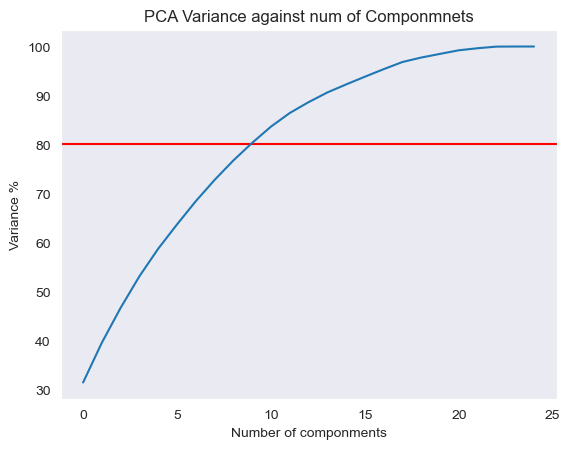

In [75]:
df_to_kmeans = df_select(num_and_cat_cols, df)
df_kmeans_scaled_train = standard_scaling_dfs(df_to_kmeans)
pca_graph_df(df_scaled=df_kmeans_scaled_train, exp_variance=80)  #Step 3.1.1

In [76]:
df_with_pca = create_pca_df(9, df_kmeans_scaled_train)

## Model Train

In [77]:
ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k).fit(df_with_pca)
    inertias.append(model.inertia_)

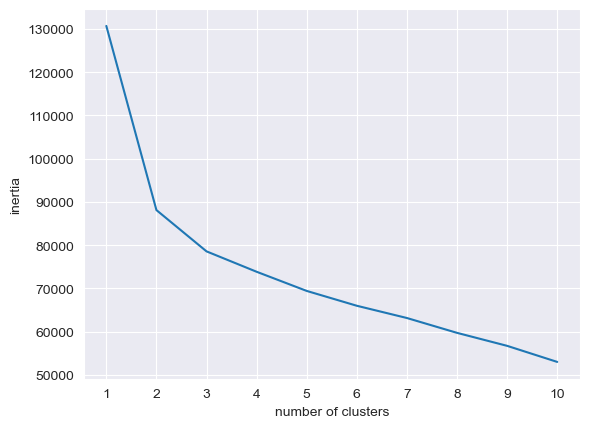

In [78]:
plt.plot(ks, inertias)
plt.xlabel('number of clusters')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [79]:
kmeans_result = KMeans(n_clusters=4, max_iter=10000, random_state=1)
kmeans_result.fit(df_with_pca)
pca_train_label = kmeans_result.labels_
pca_train_label = pd.DataFrame(pca_train_label)

In [80]:
df['Cluster_KM'] = kmeans_result.predict(df_with_pca)
export_csv_to_analyze_cluster_results(df, 'Cluster_KM')

Income (mean)  Kid_Younger6 (mean)  Children_6to18 (mean)  \
Cluster_KM                                                              
0              108813.585                0.024                  0.282   
1               54238.346                0.712                  0.714   
2               80455.040                0.403                  0.777   
3               43690.375                0.897                  0.172   

            NumPurchasesTotal (mean)  Age (mean)  Male (sum)  Female (sum)  \
Cluster_KM                                                                   
0                             22.175      48.263        1616           596   
1                              8.749      51.118        1173           421   
2                             19.238      48.777        1306           464   
3                              8.491      34.365         902           334   

            daysAsCardClient (mean)  Graduation (sum)  HighSchool (sum)  ...  \
Cluster_KM                                                               ...   
0                           609.787            1143.0               190  ...   
1                           587.775             761.0               121  ...   
2                           735.437             880.0               137  ...   
3                           610.489             635.0               199  ...   

            Pct_Meat&Fish (mean)  Pct_Desserts (mean)  Pct_Entries (mean)  \
Cluster_KM                                                                  
0                          0.373                0.083               0.083   
1                          0.447                0.076               0.078   
2                          0.547                0.059               0.059   
3                          0.260                0.128               0.133   

            Pct_AdditionalRequests (mean)  Pct_Drinks (mean)  \
Cluster_KM                                                     
0                                   0.005              0.084   
1                                   0.015              0.079   
2                                   0.010              0.061   
3                                   0.019              0.132   

            Pct_Vegan&Vegetarian (mean)  Pct_Store (mean)  Pct_App (mean)  \
Cluster_KM                                                                  
0                                 0.372             0.385           0.321   
1                                 0.306             0.371           0.458   
2                                 0.264             0.364           0.442   
3                                 0.329             0.361           0.470   

            Pct_TakeAway (mean)  NumOfferPurchases (mean)  
Cluster_KM                                                 
0                         0.294                     0.337  
1                         0.171                     0.456  
2                         0.194                     0.673  
3                         0.169                     0.438  

[4 rows x 28 columns]

In [81]:
df.head()

Income  Kid_Younger6  Children_6to18  Recency  MntMeat&Fish  \
CustomerID                                                                  
14594       113947.0             0               0     43.0         3.667   
19070       114297.0             0               0     74.0         3.850   
29888       115476.0             0               0     85.0         3.616   
12221       101172.0             1               1     25.0         3.555   
21107       123128.0             0               0     64.0         3.732   

            MntEntries  MntVegan&Vegetarian  MntDrinks  MntDesserts  \
CustomerID                                                            
14594            3.529                3.756      3.350        2.751   
19070            3.566                3.882      3.265        3.087   
29888            2.581                3.689      3.561        2.581   
12221            0.000                3.248      1.908        2.258   
21107            3.052                3.978      2.818        2.751   

            MntAdditionalRequests  ...  Pct_Meat&Fish  Pct_Desserts  \
CustomerID                         ...                                
14594                       2.190  ...          0.278         0.034   
19070                       1.672  ...          0.330         0.057   
29888                       1.462  ...          0.307         0.028   
12221                       1.176  ...          0.637         0.032   
21107                       1.875  ...          0.312         0.032   

            Pct_Entries  Pct_Drinks  Pct_Vegan&Vegetarian  \
CustomerID                                                  
14594             0.203       0.134                 0.342   
19070             0.171       0.086                 0.355   
29888             0.028       0.271                 0.364   
12221             0.000       0.014                 0.314   
21107             0.065       0.038                 0.549   

            Pct_AdditionalRequests  Pct_Store  Pct_App  Pct_TakeAway  \
CustomerID                                                             
14594                        0.009      0.292    0.417         0.292   
19070                        0.002      0.462    0.192         0.346   
29888                        0.002      0.412    0.294         0.294   
12221                        0.002      0.421    0.421         0.158   
21107                        0.004      0.421    0.211         0.368   

            Cluster_KM  
CustomerID              
14594                0  
19070                0  
29888                0  
12221                2  
21107                0  

[5 rows x 52 columns]

In [82]:
df.groupby('Cluster_KM').mean().transpose()

Cluster_KM                       0          1          2          3
Income                  108813.585  5.424e+04  80455.040  4.369e+04
Kid_Younger6                 0.024  7.120e-01      0.403  8.972e-01
Children_6to18               0.282  7.139e-01      0.777  1.715e-01
Recency                     49.949  4.842e+01     49.405  4.846e+01
MntMeat&Fish                 3.677  2.379e+00      3.517  2.042e+00
MntEntries                   2.851  1.210e+00      2.079  1.600e+00
MntVegan&Vegetarian          3.683  2.284e+00      3.205  2.301e+00
MntDrinks                    2.848  1.194e+00      2.104  1.587e+00
MntDesserts                  2.838  1.193e+00      2.099  1.597e+00
MntAdditionalRequests        1.665  9.185e-01      1.631  1.027e+00
NumOfferPurchases            0.337  4.564e-01      0.673  4.378e-01
NumAppPurchases              7.070  4.019e+00      8.428  4.013e+00
NumTakeAwayPurchases         0.852  3.848e-01      0.651  3.749e-01
NumStorePurchases            8.561  3.233e+00      7.058  3.042e+00
NumAppVisitsMonth            2.779  6.146e+00      6.463  6.650e+00
Response_Cmp1                0.020  1.870e-02      0.033  2.436e-02
Response_Cmp2                0.036  6.232e-03      0.033  9.742e-04
Response_Cmp3                0.070  0.000e+00      0.007  0.000e+00
Response_Cmp4                0.050  3.777e-04      0.013  4.871e-04
Response_Cmp5                0.007  1.889e-04      0.007  0.000e+00
Male                         0.731  7.359e-01      0.738  7.298e-01
Female                       0.269  2.641e-01      0.262  2.702e-01
NumPurchasesTotal           22.175  8.749e+00     19.238  8.491e+00
Age                         48.263  5.112e+01     48.777  3.436e+01
daysAsCardClient           609.787  5.878e+02    735.437  6.105e+02
Graduation                   0.517  4.774e-01      0.497  5.138e-01
HighSchool                   0.086  7.591e-02      0.077  1.610e-01
Master                       0.170  1.782e-01      0.177  1.149e-01
PhD                          0.227  2.453e-01      0.244  1.052e-01
Married                      0.654  6.568e-01      0.647  6.561e-01
Single                       0.205  2.001e-01      0.213  2.848e-01
Widow                        0.043  3.890e-02      0.042  2.427e-03
MntTotal                 15417.267  9.587e+02   7839.419  9.148e+02
Mnt_pday_card               27.164  1.814e+00     11.135  1.595e+00
Response_Campaigns           0.604  8.469e-02      0.310  8.576e-02
Total_Kids                   0.305  1.426e+00      1.180  1.069e+00
has_Kids                     0.287  9.078e-01      0.910  9.005e-01
age_(17.943, 29.4]           0.113  1.255e-03      0.026  2.120e-01
age_(29.4, 40.8]             0.211  3.137e-03      0.207  7.662e-01
age_(40.8, 52.2]             0.258  5.941e-01      0.374  8.091e-04
age_(52.2, 63.6]             0.255  3.294e-01      0.322  8.091e-04
age_(63.6, 75.0]             0.164  7.215e-02      0.071  2.023e-02
Pct_Meat&Fish                0.373  4.467e-01      0.547  2.597e-01
Pct_Desserts                 0.083  7.608e-02      0.059  1.279e-01
Pct_Entries                  0.083  7.834e-02      0.059  1.326e-01
Pct_Drinks                   0.084  7.855e-02      0.061  1.322e-01
Pct_Vegan&Vegetarian         0.372  3.056e-01      0.264  3.290e-01
Pct_AdditionalRequests       0.005  1.463e-02      0.010  1.855e-02
Pct_Store                    0.385  3.714e-01      0.364  3.609e-01
Pct_App                      0.321  4.578e-01      0.442  4.702e-01
Pct_TakeAway                 0.294  1.708e-01      0.194  1.689e-01

In [83]:
df.groupby('Cluster_KM').count()

Income  Kid_Younger6  Children_6to18  Recency  MntMeat&Fish  \
Cluster_KM                                                                
0             2212          2212            2212     2212          2212   
1             1594          1594            1594     1594          1594   
2             1770          1770            1770     1770          1770   
3             1236          1236            1236     1236          1236   

            MntEntries  MntVegan&Vegetarian  MntDrinks  MntDesserts  \
Cluster_KM                                                            
0                 2212                 2212       2212         2212   
1                 1594                 1594       1594         1594   
2                 1770                 1770       1770         1770   
3                 1236                 1236       1236         1236   

            MntAdditionalRequests  ...  age_(63.6, 75.0]  Pct_Meat&Fish  \
Cluster_KM                         ...                                    
0                            2212  ...              2212           2212   
1                            1594  ...              1594           1594   
2                            1770  ...              1770           1770   
3                            1236  ...              1236           1236   

            Pct_Desserts  Pct_Entries  Pct_Drinks  Pct_Vegan&Vegetarian  \
Cluster_KM                                                                
0                   2212         2212        2212                  2212   
1                   1594         1594        1594                  1594   
2                   1770         1770        1770                  1770   
3                   1236         1236        1236                  1236   

            Pct_AdditionalRequests  Pct_Store  Pct_App  Pct_TakeAway  
Cluster_KM                                                            
0                             2212       2212     2212          2212  
1                             1594       1594     1594          1594  
2                             1770       1770     1770          1770  
3                             1236       1236     1236          1236  

[4 rows x 51 columns]

<AxesSubplot: xlabel='Pct_Meat&Fish', ylabel='Pct_Vegan&Vegetarian'>

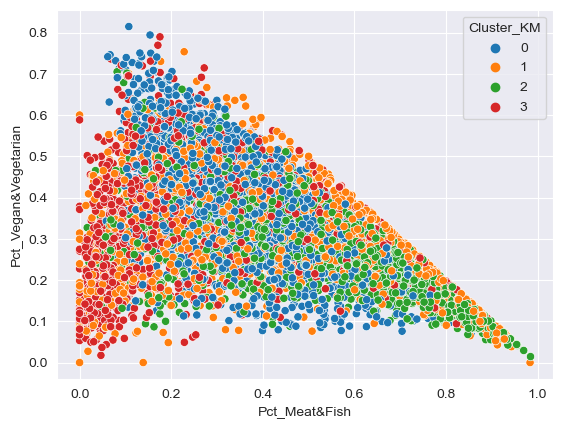

In [84]:
sns.scatterplot(data=df, x='Pct_Meat&Fish', y='Pct_Vegan&Vegetarian', hue='Cluster_KM', palette='tab10')

<AxesSubplot: xlabel='Income', ylabel='MntTotal'>

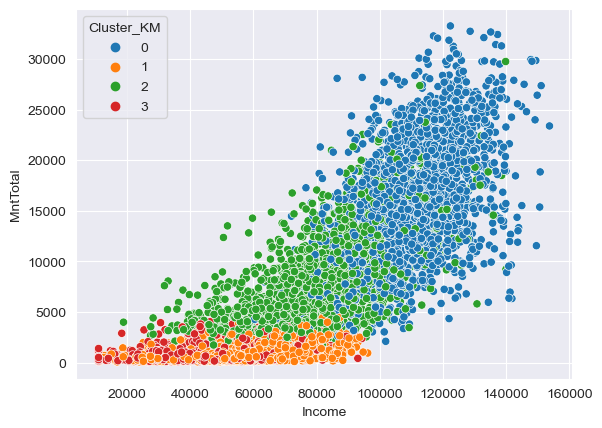

In [85]:
sns.scatterplot(data=df, x='Income', y='MntTotal', hue='Cluster_KM', palette='tab10')

## K-Prototype

In [86]:
k_prototype_columns = []
k_prototype_columns.extend(num_cols)
k_prototype_columns.extend(cat_cols)

k_prototype_df = df_select(column_names=k_prototype_columns, df=df)

df_num = k_prototype_df[num_cols]
df_cat = k_prototype_df[cat_cols]

df_num = df_num.reset_index(drop=True)
df_cat = df_cat.reset_index(drop=True)

df_num_scaled = standard_scaling_dfs(df_num)

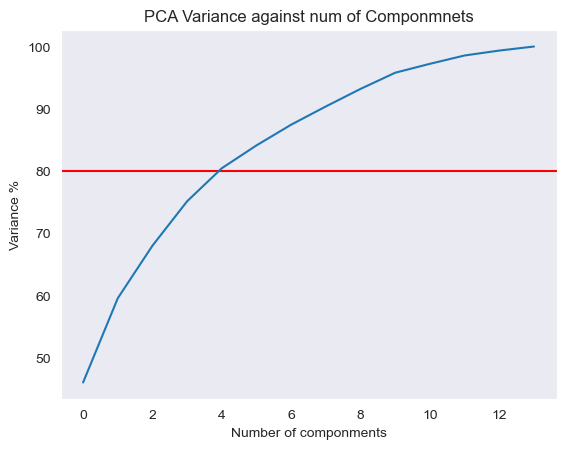

In [87]:
pca_graph_df(df_scaled=df_num_scaled, exp_variance=80)  #Step 3.1.1

In [88]:
df_num_pca = create_pca_df(4, df_num_scaled)

In [89]:
# Combining cat and num columns to run
df_combined = pd.concat([pd.DataFrame(df_num_pca), df_cat], axis=1)

In [90]:
def plot_elbow(X, k_range):
    costs = []
    for k in k_range:
        print(k)
        kp = KPrototypes(n_clusters=k, init='Cao', n_init=20, verbose=0, n_jobs=4, random_state=1)
        kp.fit(X, categorical=[i for i in range(4, len(X.columns))])
        costs.append(kp.cost_)
    plt.plot(k_range, costs, marker='o')
    plt.xticks(k_range)
    plt.xlabel('Número de clusters (k)')
    plt.ylabel('Cost')
    plt.show()

In [91]:
# plot_elbow(df_combined, range(1, 11))

In [92]:
df_combined.head()

0      1      2      3  Married  Single  Widow  NumPurchasesTotal  \
0 -3.457  0.746 -0.693  0.221        0       1      0                 24   
1 -3.764 -1.208 -0.453 -0.870        1       0      0                 26   
2 -2.402 -2.101  0.087 -1.205        1       0      0                 17   
3 -0.364  0.960  1.817  0.967        1       0      0                 19   
4 -2.792 -1.248 -0.752 -0.598        0       1      0                 19   

   Response_Campaigns  Kid_Younger6  age_(17.943, 29.4]  age_(29.4, 40.8]  \
0                   1             0                   0                 0   
1                   0             0                   0                 0   
2                   0             0                   0                 0   
3                   0             1                   0                 0   
4                   2             0                   0                 0   

   age_(40.8, 52.2]  age_(52.2, 63.6]  age_(63.6, 75.0]  
0                 1                 0                 0  
1                 1                 0                 0  
2                 0                 1                 0  
3                 1                 0                 0  
4                 1                 0                 0

In [93]:
kprototype_result = KPrototypes(n_clusters=4, init='Cao', n_init=20, verbose=0, n_jobs=4, random_state=1)
clusters_kp = kprototype_result.fit_predict(df_combined, categorical=[i for i in range(4, len(df_combined.columns))])

In [94]:
df['Cluster_KP'] = clusters_kp
export_csv_to_analyze_cluster_results(df, 'Cluster_KP')

Income (mean)  Kid_Younger6 (mean)  Children_6to18 (mean)  \
Cluster_KP                                                              
0               47749.222                0.784                  0.382   
1               81212.408                0.377                  0.803   
2              108400.182                0.053                  0.294   
3               51379.293                0.788                  0.570   

            NumPurchasesTotal (mean)  Age (mean)  Male (sum)  Female (sum)  \
Cluster_KP                                                                   
0                              9.557      42.734        1108           421   
1                             19.662      48.750        1226           420   
2                             21.968      48.087        1656           624   
3                              7.723      45.562        1007           350   

            daysAsCardClient (mean)  Graduation (sum)  HighSchool (sum)  ...  \
Cluster_KP                                                               ...   
0                           674.652             813.0               226  ...   
1                           738.566             796.0               118  ...   
2                           606.946            1186.0               201  ...   
3                           523.943             624.0               102  ...   

            Pct_Meat&Fish (mean)  Pct_Desserts (mean)  Pct_Entries (mean)  \
Cluster_KP                                                                  
0                          0.272                0.129               0.130   
1                          0.576                0.052               0.051   
2                          0.371                0.084               0.085   
3                          0.456                0.068               0.074   

            Pct_AdditionalRequests (mean)  Pct_Drinks (mean)  \
Cluster_KP                                                     
0                                   0.019              0.135   
1                                   0.009              0.052   
2                                   0.005              0.086   
3                                   0.014              0.069   

            Pct_Vegan&Vegetarian (mean)  Pct_Store (mean)  Pct_App (mean)  \
Cluster_KP                                                                  
0                                 0.316             0.353           0.472   
1                                 0.260             0.362           0.443   
2                                 0.369             0.387           0.323   
3                                 0.318             0.380           0.454   

            Pct_TakeAway (mean)  NumOfferPurchases (mean)  
Cluster_KP                                                 
0                         0.174                     0.503  
1                         0.195                     0.681  
2                         0.291                     0.345  
3                         0.165                     0.389  

[4 rows x 28 columns]

In [95]:
k_prototype_df.head()

Income  Recency  MntMeat&Fish  MntEntries  MntVegan&Vegetarian  \
CustomerID                                                                     
14594       113947.0     43.0         3.667       3.529                3.756   
19070       114297.0     74.0         3.850       3.566                3.882   
29888       115476.0     85.0         3.616       2.581                3.689   
12221       101172.0     25.0         3.555       0.000                3.248   
21107       123128.0     64.0         3.732       3.052                3.978   

            MntDrinks  MntDesserts  MntAdditionalRequests  NumOfferPurchases  \
CustomerID                                                                     
14594           3.350        2.751                  2.190              0.477   
19070           3.265        3.087                  1.672              0.301   
29888           3.561        2.581                  1.462              0.301   
12221           1.908        2.258                  1.176              0.778   
21107           2.818        2.751                  1.875              0.000   

            NumAppPurchases  ...  Single  Widow  NumPurchasesTotal  \
CustomerID                   ...                                     
14594                    10  ...       1      0                 24   
19070                     5  ...       0      0                 26   
29888                     5  ...       0      0                 17   
12221                     8  ...       0      0                 19   
21107                     4  ...       1      0                 19   

            Response_Campaigns  Kid_Younger6  age_(17.943, 29.4]  \
CustomerID                                                         
14594                        1             0                   0   
19070                        0             0                   0   
29888                        0             0                   0   
12221                        0             1                   0   
21107                        2             0                   0   

            age_(29.4, 40.8]  age_(40.8, 52.2]  age_(52.2, 63.6]  \
CustomerID                                                         
14594                      0                 1                 0   
19070                      0                 1                 0   
29888                      0                 0                 1   
12221                      0                 1                 0   
21107                      0                 1                 0   

            age_(63.6, 75.0]  
CustomerID                    
14594                      0  
19070                      0  
29888                      0  
12221                      0  
21107                      0  

[5 rows x 25 columns]

<AxesSubplot: xlabel='Income', ylabel='Count'>

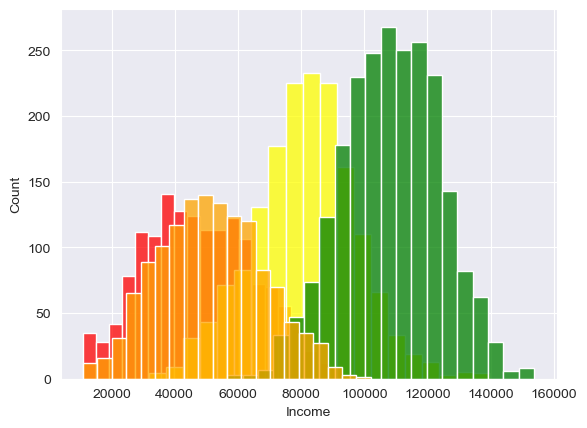

In [96]:
cluster0 = df[df.Cluster_KP == 0]
cluster1 = df[df.Cluster_KP == 1]
cluster2 = df[df.Cluster_KP == 2]
cluster3 = df[df.Cluster_KP == 3]

sns.histplot(cluster0['Income'], color='red', label='Cluster_KP 0', bins=20)
sns.histplot(cluster1['Income'], color='yellow', label='Cluster_KP 1', bins=20)
sns.histplot(cluster2['Income'], color='green', label='Cluster_KP 2', bins=20)
sns.histplot(cluster3['Income'], color='orange', label='Cluster_KP 3', bins=20)

#plt.legend()

Text(0, 0.5, 'Value')

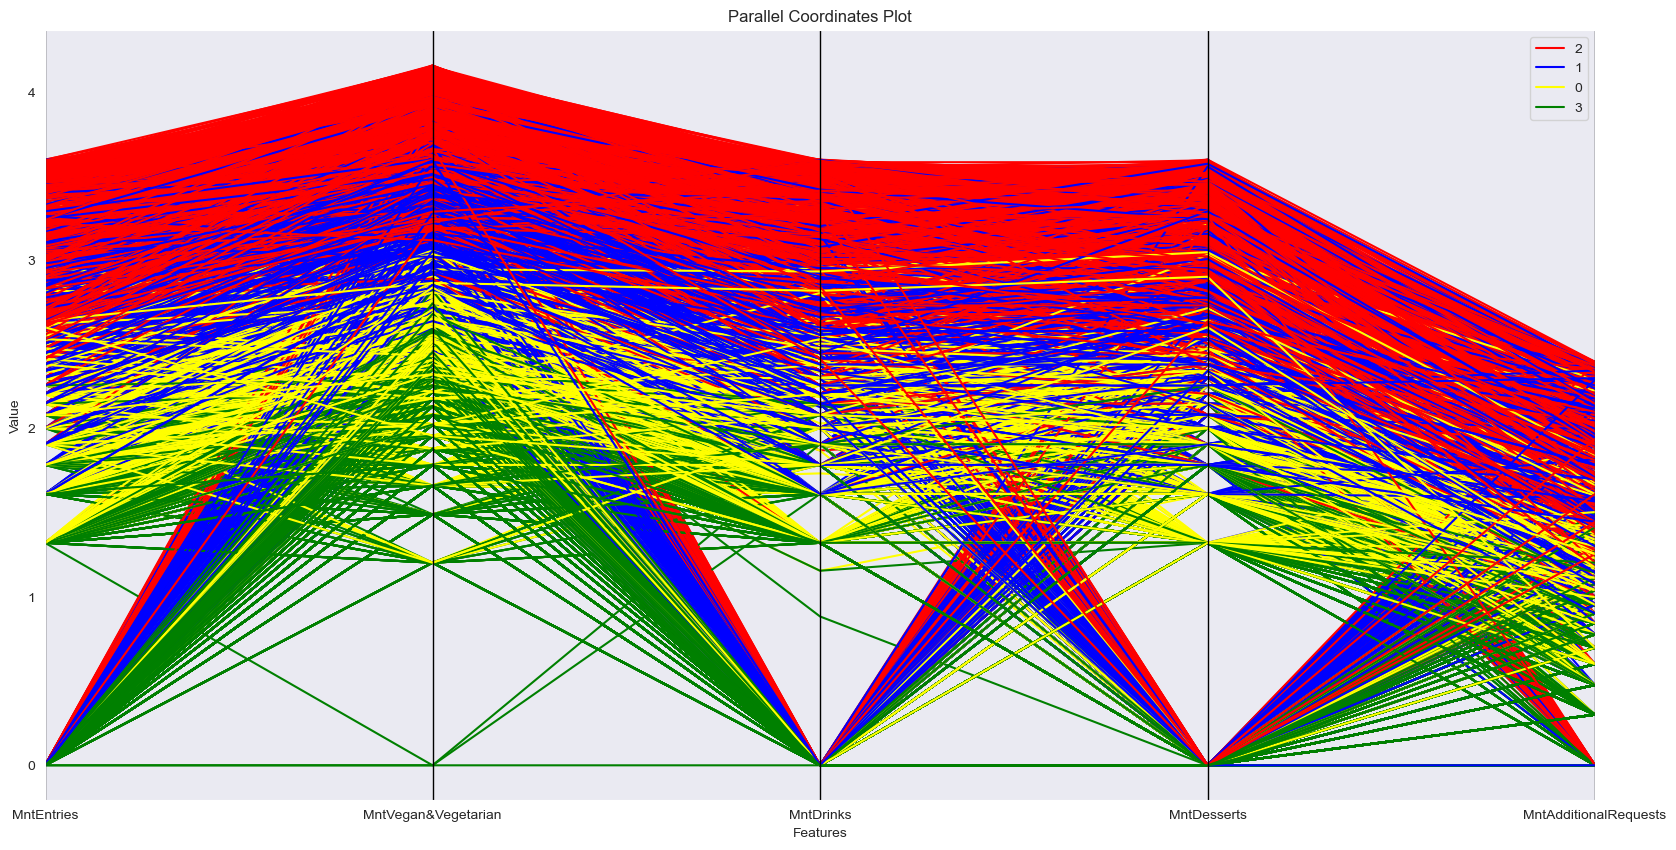

In [97]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[['MntEntries', 'MntVegan&Vegetarian', 'MntDrinks', 'MntDesserts',
                         'MntAdditionalRequests', 'Cluster_KP']], 'Cluster_KP',
                     color=('red', 'blue', 'yellow', 'green'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

#plt.show()

Text(0, 0.5, 'Value')

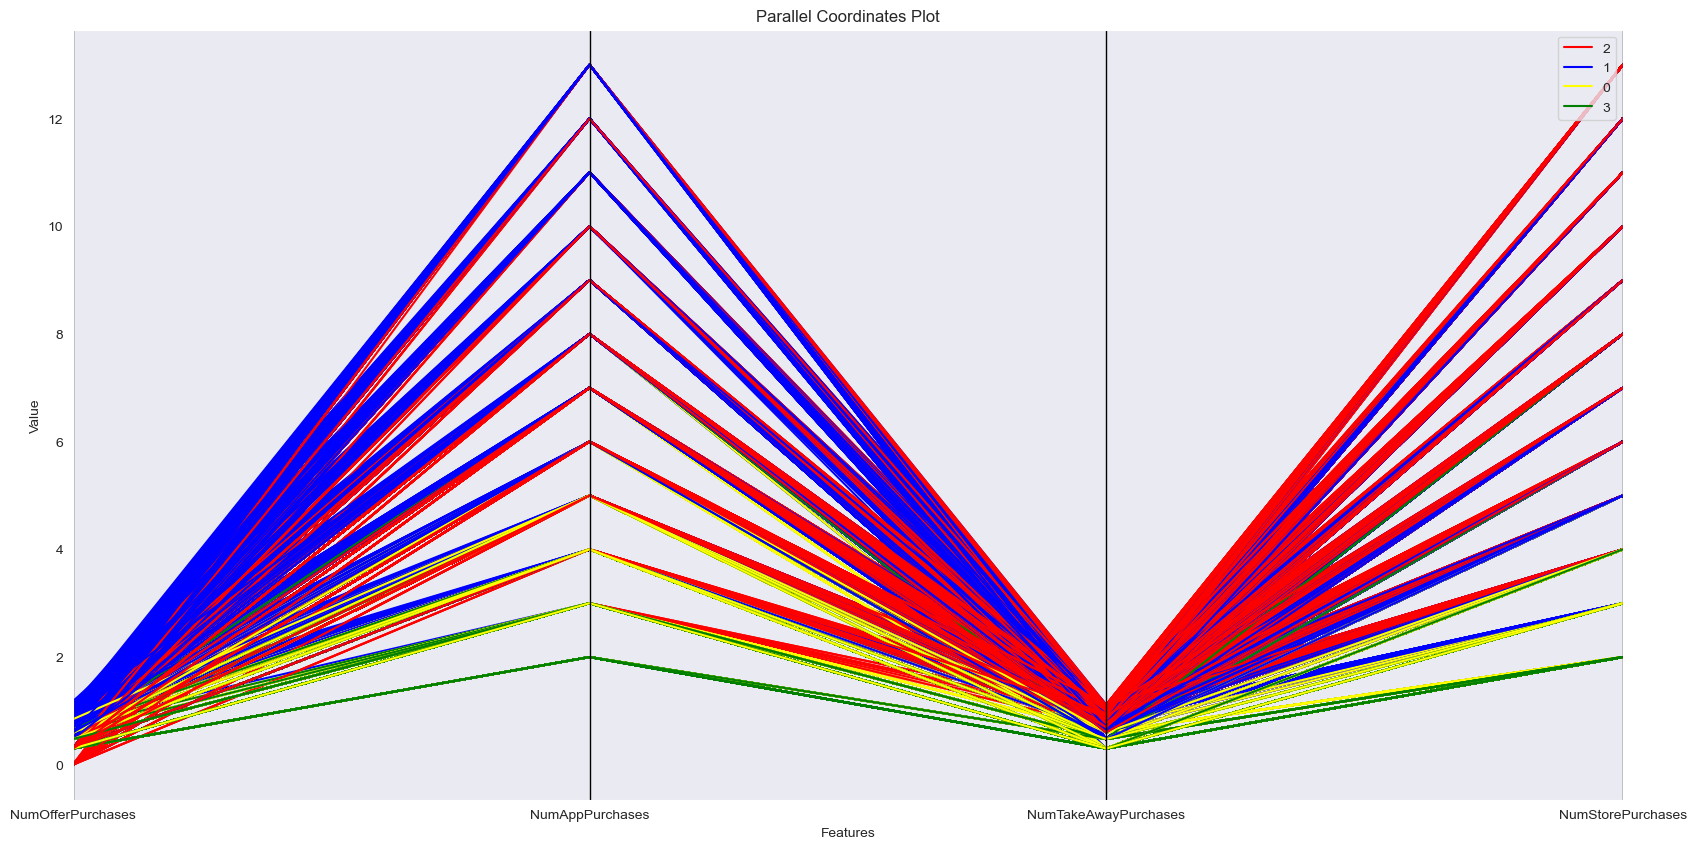

In [98]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[['NumOfferPurchases', 'NumAppPurchases',
                         'NumTakeAwayPurchases', 'NumStorePurchases', 'Cluster_KP']], 'Cluster_KP',
                     color=('red', 'blue', 'yellow', 'green'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

#plt.show()

Text(0, 0.5, 'Value')

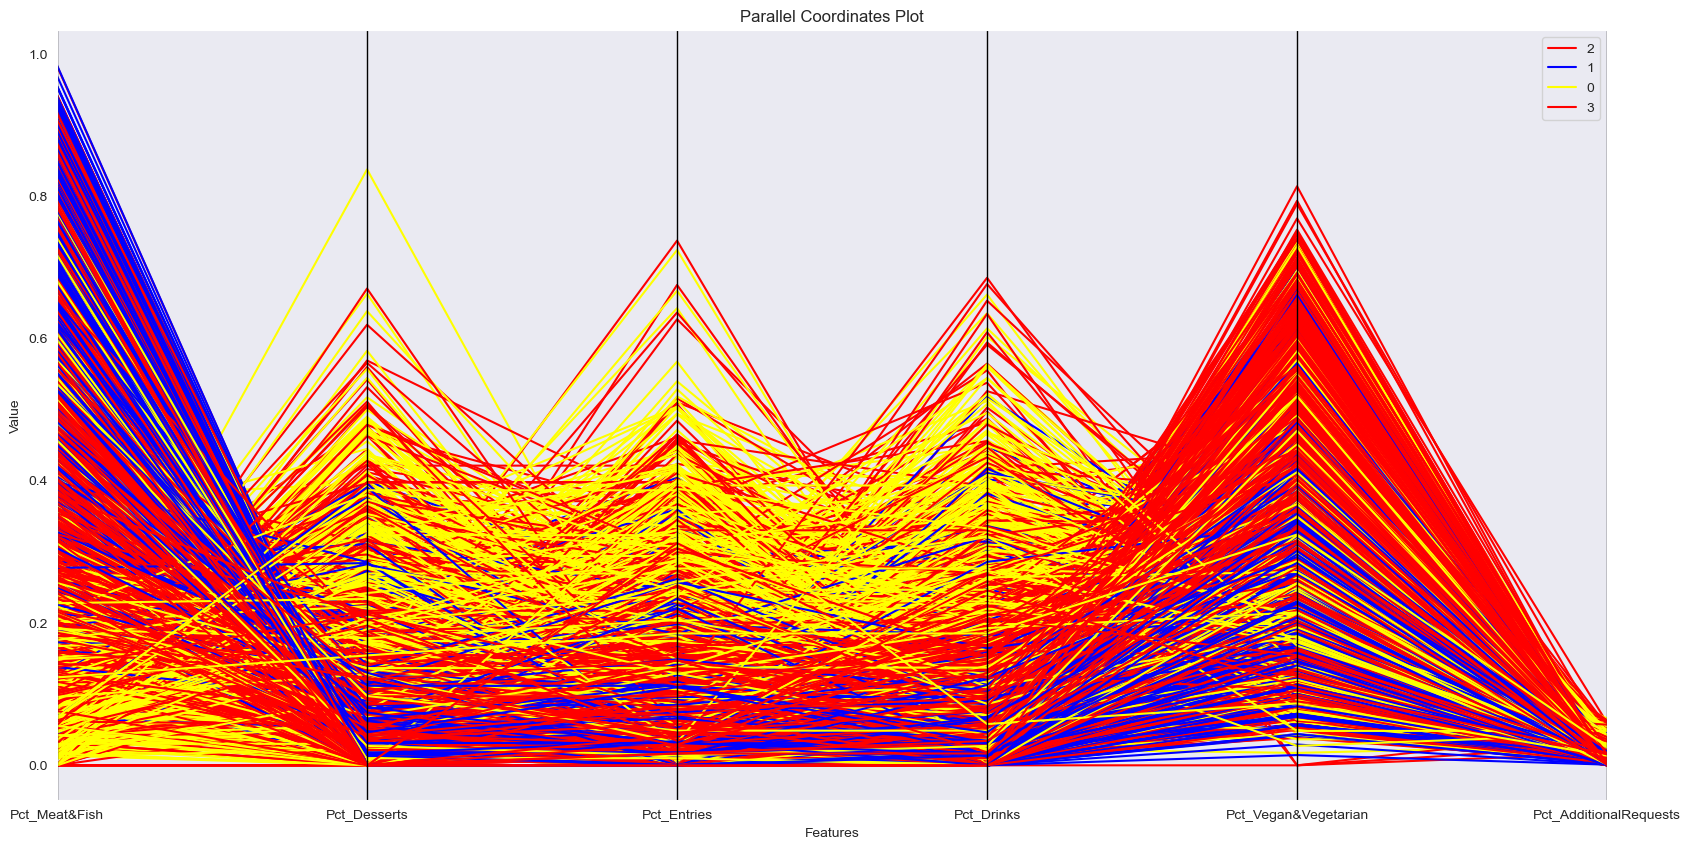

In [99]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[['Pct_Meat&Fish', 'Pct_Desserts', 'Pct_Entries',
                         'Pct_Drinks', 'Pct_Vegan&Vegetarian', 'Pct_AdditionalRequests', 'Cluster_KP']], 'Cluster_KP',
                     color=('red', 'blue', 'yellow'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

#plt.show()

Text(0, 0.5, 'Value')

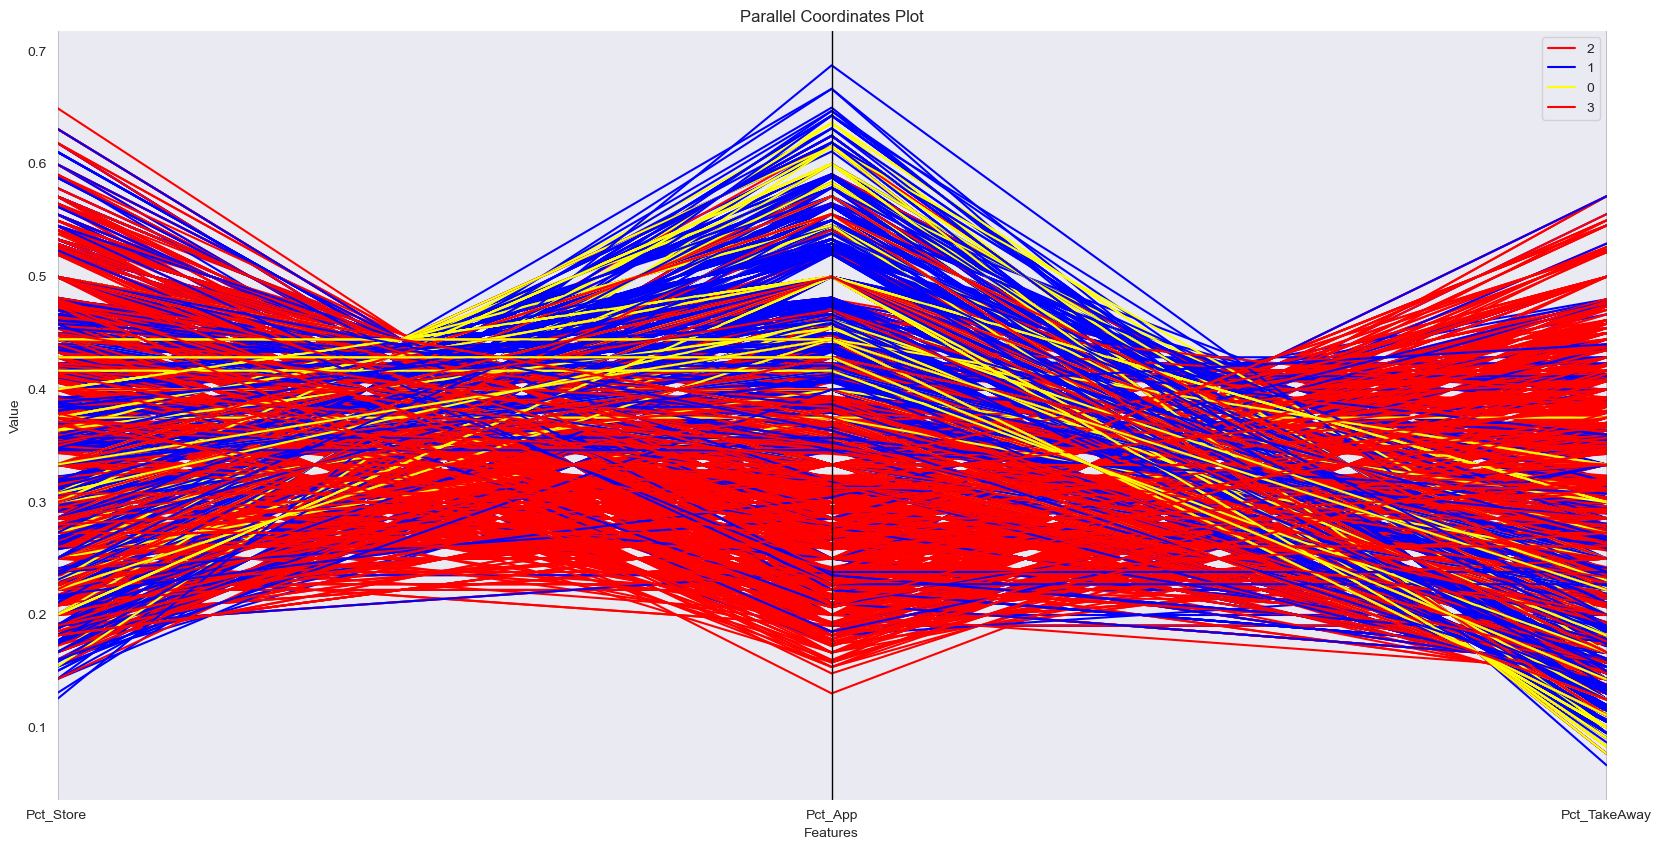

In [100]:
fig = plt.figure(figsize=(20, 10))

parallel_coordinates(df[['Pct_Store', 'Pct_App', 'Pct_TakeAway', 'Cluster_KP']], 'Cluster_KP',
                     color=('red', 'blue', 'yellow'))

plt.title('Parallel Coordinates Plot')
plt.xlabel('Features')
plt.ylabel('Value')

#plt.show()

## Compare Clusters methods

#### Measure clusters distance

In [101]:
dists = euclidean_distances(kmeans_result.cluster_centers_)
dists

array([[0.        , 5.96588289, 3.26639249, 6.20304959],
       [5.96588289, 0.        , 4.25664049, 2.5539715 ],
       [3.26639249, 4.25664049, 0.        , 4.70614987],
       [6.20304959, 2.5539715 , 4.70614987, 0.        ]])

In [102]:
dists = euclidean_distances(kprototype_result.cluster_centroids_)
dists

array([[ 0.        ,  8.71395448, 15.76872703,  3.03454895],
       [ 8.71395448,  0.        ,  7.67636554, 11.13767863],
       [15.76872703,  7.67636554,  0.        , 18.06971479],
       [ 3.03454895, 11.13767863, 18.06971479,  0.        ]])

In [103]:
dist_kmeans = dists[0][0]
dist_kprototype = dists[0][0]
if dist_kmeans > dist_kprototype:
    print("k-means create higher distance between centroids center")
else:
    print("k-prototype create higher distance between centroids center")

k-prototype create higher distance between centroids center


#### Checking PCT Cluster distribution

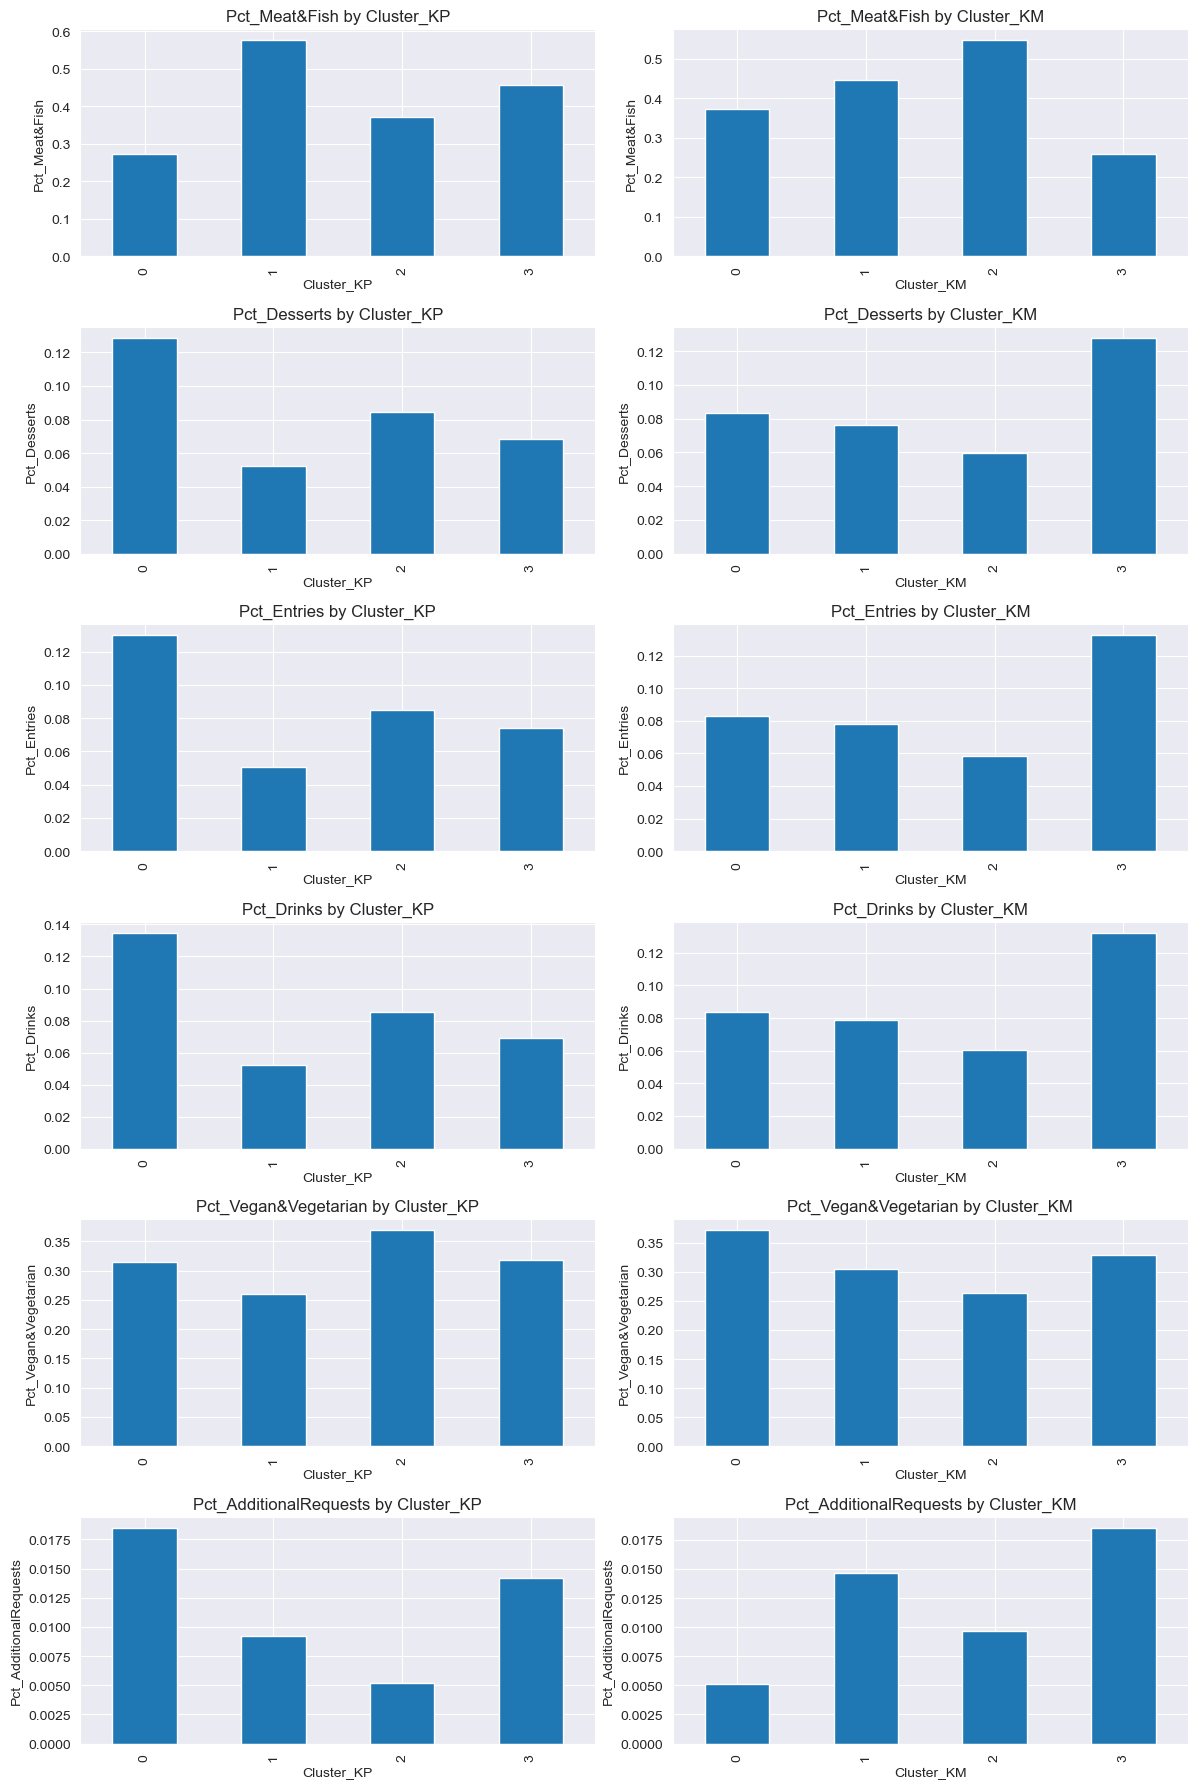

In [108]:
variables = ['Pct_Meat&Fish', 'Pct_Desserts', 'Pct_Entries', 'Pct_Drinks', 'Pct_Vegan&Vegetarian', 'Pct_AdditionalRequests']

fig, axs = plt.subplots(nrows=len(variables), ncols=2, figsize=(12, 3*len(variables)))

for i, var in enumerate(variables):
    grouped = df.groupby('Cluster_KP')[var].mean()
    ax = axs[i, 0]
    grouped.plot(kind='bar', ax=ax)
    ax.set_xlabel('Cluster_KP')
    ax.set_ylabel(var)
    ax.set_title(var + ' by Cluster_KP')

    grouped = df.groupby('Cluster_KM')[var].mean()
    ax = axs[i, 1]
    grouped.plot(kind='bar', ax=ax)
    ax.set_xlabel('Cluster_KM')
    ax.set_ylabel(var)
    ax.set_title(var + ' by Cluster_KM')

plt.tight_layout()
plt.show()

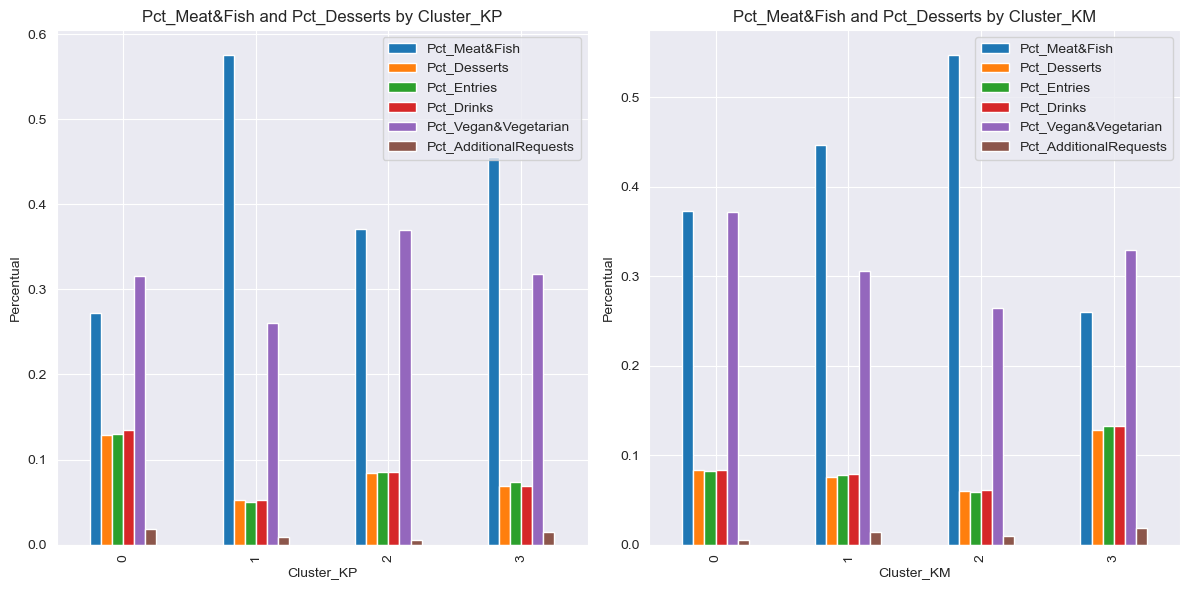

In [109]:
grouped_KP = df.groupby('Cluster_KP')[['Pct_Meat&Fish', 'Pct_Desserts', 'Pct_Entries', 'Pct_Drinks', 'Pct_Vegan&Vegetarian', 'Pct_AdditionalRequests']].mean()
grouped_KM = df.groupby('Cluster_KM')[['Pct_Meat&Fish', 'Pct_Desserts', 'Pct_Entries', 'Pct_Drinks', 'Pct_Vegan&Vegetarian', 'Pct_AdditionalRequests']].mean()

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))

grouped_KP.plot(kind='bar', ax=ax1)
ax1.set_xlabel('Cluster_KP')
ax1.set_ylabel('Percentual')
ax1.set_title('Pct_Meat&Fish and Pct_Desserts by Cluster_KP')

grouped_KM.plot(kind='bar', ax=ax2)
ax2.set_xlabel('Cluster_KM')
ax2.set_ylabel('Percentual')
ax2.set_title('Pct_Meat&Fish and Pct_Desserts by Cluster_KM')

plt.tight_layout()
plt.show()

- Barplots das PCT de MNT e Takeway, app e store
- CSV do Kmeans e KPrototype
- parallel_coordinates dos dois
- scatterplot kmeans e kprototype